# Аппроксимация линейной функцией с помощью МНК

## Теория

Любая линейная функция может быть записана уравнением:

$$y=a \cdot x+b$$

Аппроксимация заключается в отыскании коэффициентов $a$ и $b$ уравнения таких, чтобы все экспериментальные точки лежали наиболее близко к аппроксимирующей прямой.

С этой целью чаще всего используется метод наименьших квадратов (МНК), суть которого заключается в следующем: сумма квадратов отклонений значения точки от аппроксимирующей точки принимает минимальное значение:

$$F(a,b)= \sum_{i=1}^{n} (y_i-(a \cdot x_i+b))^2 \rightarrow min$$

Решение поставленной задачи сводится к нахождению экстремума указанной функции двух переменных. С этой целью находим частные производные функции функции по коэффициентам $a$ и $b$ и приравниваем их к нулю:

$$\left\{\begin{matrix} \frac{\partial F(a,b)}{\partial a} = -2 \sum_{i=1}^{n} (y_i-(a \cdot x_i+b)) \cdot x_i = 0 \\ \frac{\partial F(a,b)}{\partial b} = -2 \sum_{i=1}^{n} (y_i-(a \cdot x_i+b)) = 0 \end{matrix}\right.$$

Решаем полученную систему уравнений и определяем значения коэффициентов:

$$\left\{\begin{matrix}
a = \frac{n \cdot \sum_{i=1}^{n} x_i \cdot y_i - \sum_{i=1}^{n} x_i \cdot \sum_{i=1}^{n} y_i}{n \cdot \sum_{i=1}^{n} x_i^2 - (\sum_{i=1}^{n} x_i)^2  }
\\ b = \frac{\sum_{i=1}^{n} y_i - a \cdot \sum_{i=1}^{n} x_i}{n}
\end{matrix}\right.$$

## Реализация и тест

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_approx(x, y):
    '''
    Принимает на вход два массива точек (x, y) и возвращает
    коэффициенты a и b, которые соответствуют прямой, наилучшим
    образом апроксимирующей данные точки.
    '''
    sumx, sumy, sumx2, sumxy = 0, 0, 0, 0
    n = len(x)
    
    for (curr_x, curr_y) in zip(x, y):
        sumx += curr_x
        sumy += curr_y
        sumx2 += curr_x ** 2
        sumxy += curr_x * curr_y
        
    a = (n * sumxy - (sumx * sumy)) / (n * sumx2 - sumx ** 2)
    b = (sumy - a * sumx) / n
    
    return (a, b)

In [3]:
def get_points(f):
    '''
    Принимает на вход линейную функцию f и генерирует в соответствии
    с ней точки + случайный шум.
    '''
    x = np.arange(0, 10.5, 0.5)
    y = f(x) + np.random.random(len(x)) * 30
    return (x, y)

In [4]:
def get_approx_line(x, y):
    '''
    Возвращает точки прямой, наилучшим образом апроксимирующей
    исходные точки.
    '''
    a, b = get_approx(x, y)
    f = lambda x: a * x + b
    x = np.arange(0, 11, 1)
    y = f(x)
    return(x, y)

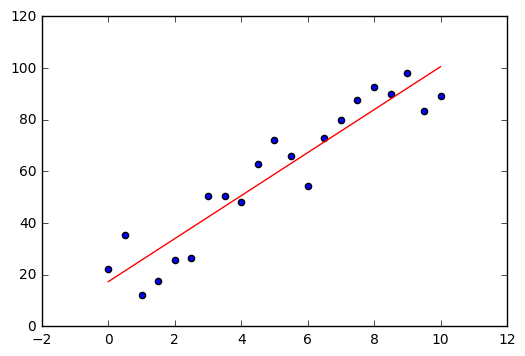

In [6]:
x, y = get_points(lambda x: 8 * x + 3)
plt.scatter(x, y)

x_approx, y_approx = get_approx_line(x, y)
plot = plt.plot(x_approx, y_approx, c='red')